Malignant vs Benign Cancer Image Classification

In [35]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.filterwarnings("ignore",category=FutureWarning)
import os
import random
from keras.preprocessing.image import load_img

In [36]:
IMAGE_SIZE = [224,224]

In [37]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"7414aeb1890d4a73a83b6a243eb750d4"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [38]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 96% 313M/325M [00:11<00:00, 20.1MB/s]
100% 325M/325M [00:11<00:00, 28.9MB/s]


In [39]:
!rm -rf datasets

In [40]:
! unzip /content/skin-cancer-malignant-vs-benign.zip

Archive:  /content/skin-cancer-malignant-vs-benign.zip
replace data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: data/test/benign/1.jpg  
replace data/test/benign/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
train_path = "/content/train"
test_path = "/content/test"

In [42]:
IMAGE_SIZE=[224,224]

In [43]:
data = []
label = []
for class_name in os.listdir("/content/train"):
    for path in os.listdir("/content/train/"+class_name):
        if class_name=='benign':
            label.append(0)
        else:
            label.append(1)
        data.append(os.path.join("/content/train",class_name,path))
print(data[0],label[0])

/content/train/benign/1709.jpg 0


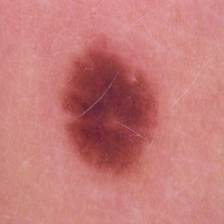

In [44]:
Image.open(data[0])

In [45]:
import pandas as pd
df = pd.DataFrame()
df['images'] = data
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/train/malignant/393.jpg,1
1,/content/train/malignant/1110.jpg,1
2,/content/train/benign/1315.jpg,0
3,/content/train/malignant/915.jpg,1
4,/content/train/malignant/968.jpg,1


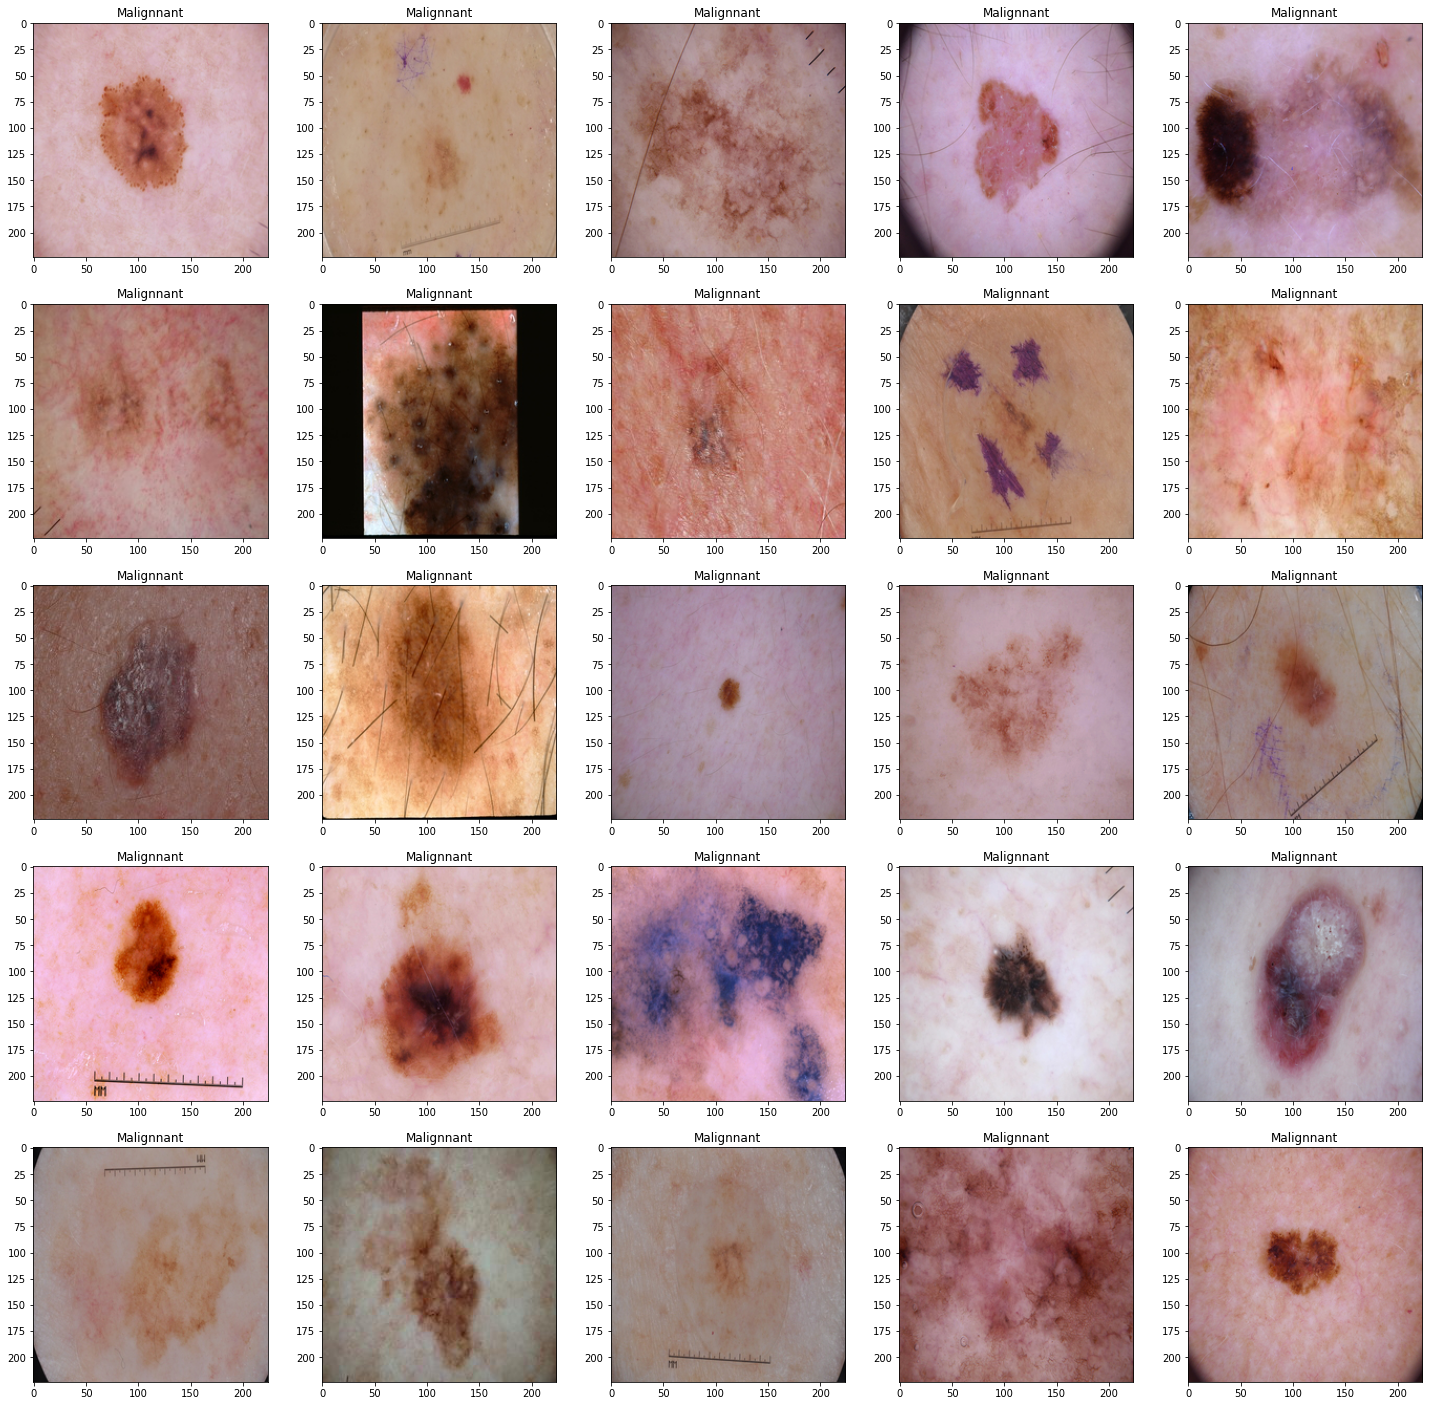

In [46]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']  #all the images of dogs will be stored in temp
start = random.randint(0,len(temp))  #this generates a random number between 0 and len(temp)
files = temp[start:start+25]         #in files we store the first 25 continuous images between the random number generated 
                                     #since temp is basically images of dogs from step 2
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.imshow(img)
  plt.title('Malignnant')
  plt.axis()

input_shape = IMAGE_SIZE+[3] as it is RGB,

weights = 'imagenet' this signifies the weights are to be directly imported from the imagenet clsassification model

include_top = False as every model has different number of outputs so thats why we define include_top = False so that it doesnt take the original number of outputs from vgg16 model

In [47]:
vgg = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top =False)

this tells the colab not to train the layers again and to directly use the parameters that the model has learnt 

In [48]:
for layer in vgg.layers:
    layer.trainable = False

glob it is useful when we want to see how many folders are there in a directory

In [49]:
count=0
for class_name in os.listdir('/content/train'):
    count+=1
count

2

In [50]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [51]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2637 images belonging to 2 classes.


In [52]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 660 images belonging to 2 classes.


In [53]:
x = Flatten()(vgg.output)
prediction = Dense(count,activation='softmax')(x)
model = Model(inputs=vgg.input,outputs = prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
5/5 - 14s - loss: 2.9354 - accuracy: 0.6687 - val_loss: 1.7834 - val_accuracy: 0.7682 - 14s/epoch - 3s/step
Epoch 2/10
5/5 - 2s - loss: 1.9416 - accuracy: 0.7812 - 2s/epoch - 426ms/step
Epoch 3/10
5/5 - 2s - loss: 2.4090 - accuracy: 0.7625 - 2s/epoch - 410ms/step
Epoch 4/10
5/5 - 2s - loss: 2.1525 - accuracy: 0.7625 - 2s/epoch - 410ms/step
Epoch 5/10
5/5 - 2s - loss: 1.9437 - accuracy: 0.8188 - 2s/epoch - 412ms/step
Epoch 6/10
5/5 - 2s - loss: 1.8529 - accuracy: 0.8125 - 2s/epoch - 408ms/step
Epoch 7/10
5/5 - 2s - loss: 1.7618 - accuracy: 0.8125 - 2s/epoch - 410ms/step
Epoch 8/10
5/5 - 2s - loss: 2.3321 - accuracy: 0.7875 - 2s/epoch - 406ms/step
Epoch 9/10
5/5 - 2s - loss: 1.7328 - accuracy: 0.7688 - 2s/epoch - 403ms/step
Epoch 10/10
5/5 - 2s - loss: 1.7048 - accuracy: 0.8375 - 2s/epoch - 412ms/step


In [57]:
from tensorflow.keras.models import load_model
model.save('cancer_vgg16.hdf5')